<a href="https://colab.research.google.com/github/timfitz196/Big-Data-Conpects/blob/main/fifa_ca/Big_data_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
fifa_data = pd.read_csv('fifa.csv')

<Figure size 1800x800 with 0 Axes>

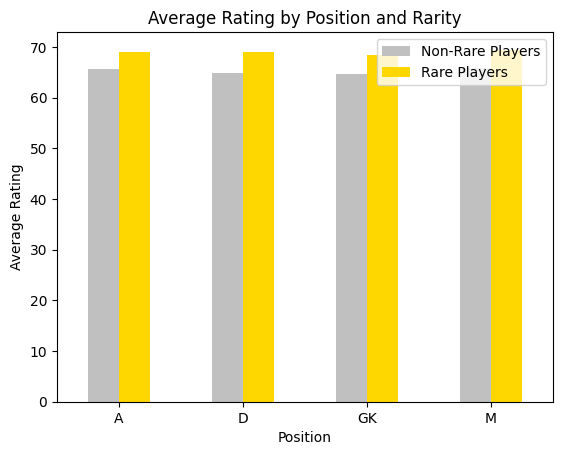

In [ ]:
# Research Question 2: Position-Specific Analysis for Rare and Non-Rare Players
if 'position' in fifa_data.columns and 'rare' in fifa_data.columns:
    # Grouping by position and rarity
    position_rarity_group = fifa_data.groupby(['position', 'rare'])['rating'].mean().unstack()

    # Plotting
    plt.figure(figsize=(18, 8))
    position_rarity_group.plot(kind='bar', color=['silver', 'gold'])
    plt.title('Average Rating by Position and Rarity')
    plt.xlabel('Position')
    plt.ylabel('Average Rating')
    plt.legend(['Non-Rare Players', 'Rare Players'])
    plt.xticks(rotation=0)  # Keep the position labels horizontal for readability
    plt.show()
else:
    missing_columns = []
    if 'position' not in fifa_data.columns:
        missing_columns.append('position')
    if 'rare' not in fifa_data.columns:
        missing_columns.append('rare')
    print(f"Missing columns required for analysis: {', '.join(missing_columns)}")

In [ ]:
print(position_rarity_group)

rare              0          1
position                      
A         65.707228  68.977755
D         64.942563  69.063408
GK        64.630542  68.361371
M         65.829133  69.448439


In [ ]:
rare_counts = fifa_data['rare'].value_counts()

In [ ]:
rare_counts

rare
0    5723
1    3124
Name: count, dtype: int64

In [ ]:
# Creating conditions for different rating categories
rating_60_or_less = fifa_data['rating'] <= 60
rating_61_to_80 = (fifa_data['rating'] > 60) & (fifa_data['rating'] <= 79)
rating_above_80 = fifa_data['rating'] > 80

# Counting rare and non-rare players for each rating category
rare_counts_60_or_less = fifa_data[rating_60_or_less]['rare'].value_counts()
rare_counts_61_to_80 = fifa_data[rating_61_to_80]['rare'].value_counts()
rare_counts_above_80 = fifa_data[rating_above_80]['rare'].value_counts()

rare_counts_60_or_less, rare_counts_61_to_80, rare_counts_above_80


(rare
 0    1351
 1     319
 Name: count, dtype: int64,
 rare
 0    4339
 1    2490
 Name: count, dtype: int64,
 rare
 1    253
 0     16
 Name: count, dtype: int64)

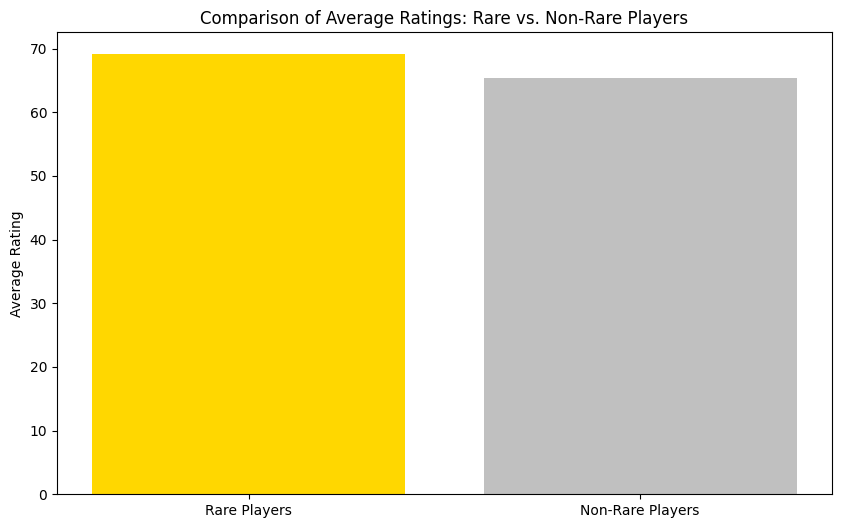

In [ ]:
# Research Question 3: Effect of Rarity on Player Performance
if 'rare' in fifa_data.columns:
    rare_avg_rating = fifa_data[fifa_data['rare'] == 1]['rating'].mean()
    not_rare_avg_rating = fifa_data[fifa_data['rare'] == 0]['rating'].mean()
    ratings = [rare_avg_rating, not_rare_avg_rating]
    labels = ['Rare Players', 'Non-Rare Players']

    plt.figure(figsize=(10, 6))
    plt.bar(labels, ratings, color=['gold', 'silver'])
    plt.title('Comparison of Average Ratings: Rare vs. Non-Rare Players')
    plt.ylabel('Average Rating')
    plt.show()
else:
    print("Rare column not found in dataset")

In [ ]:
if 'rare' in fifa_data.columns:
    rare_avg_rating = fifa_data[fifa_data['rare'] == 1]['rating'].mean()
    not_rare_avg_rating = fifa_data[fifa_data['rare'] == 0]['rating'].mean()

In [ ]:
rare_avg_rating

69.09443021766965

In [ ]:
not_rare_avg_rating

65.36274681111306

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Research Question 1: Statistical Summaries of Player Ratings Across Different Positions
if 'position' in fifa_data.columns and 'rating' in fifa_data.columns:
    position_rating_summary = fifa_data.groupby('position')['rating'].describe()
    print("Statistical summaries of player ratings across different positions:")
    print(position_rating_summary)
else:
    print("Required columns for question 1 not found.")

Statistical summaries of player ratings across different positions:
           count       mean       std   min   25%   50%   75%   max
position                                                           
A         2082.0  67.260807  7.271735  41.0  62.0  67.0  72.0  94.0
D         2794.0  66.059055  6.764867  42.0  62.0  66.0  71.0  89.0
GK         930.0  65.918280  7.673490  40.0  61.0  66.0  71.0  89.0
M         3041.0  67.087142  7.173322  41.0  62.0  67.0  72.0  92.0


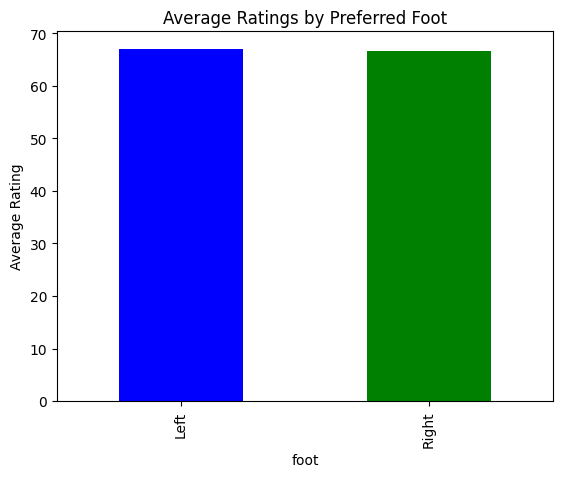

In [ ]:

# Research Question 4: Comparative Analysis of Playing Foot
if 'foot' in fifa_data.columns and 'rating' in fifa_data.columns:
    foot_rating_summary = fifa_data.groupby('foot')['rating'].mean()
    foot_rating_summary.plot(kind='bar', color=['blue', 'green'])
    plt.title('Average Ratings by Preferred Foot')
    plt.ylabel('Average Rating')
    plt.show()
else:
    print("Required columns for question 4 not found.")

In [ ]:
foot_rating_summary

foot
Left     66.979376
Right    66.588287
Name: rating, dtype: float64

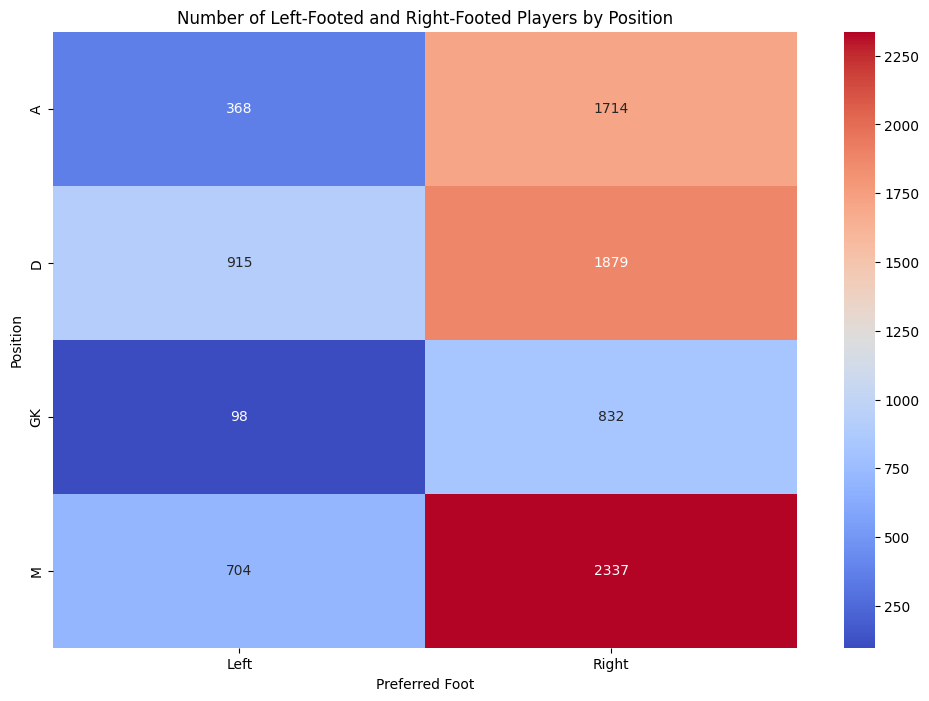

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('fifa.csv')

# Filter and aggregate the data
pivot_data = data.pivot_table(index='position', columns='foot', aggfunc='size', fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Number of Left-Footed and Right-Footed Players by Position')
plt.ylabel('Position')
plt.xlabel('Preferred Foot')
plt.show()
